In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [2]:
df = datasets.load_boston()

y = pd.DataFrame(df.target, columns=['price'])
x = pd.DataFrame(df.data, columns=df.feature_names)

In [3]:
y.shape, x.shape

((506, 1), (506, 13))

In [4]:
df_test = pd.concat((y,x), axis=1)

In [5]:
correlations = df_test.corr()
correlations.style.background_gradient(cmap='coolwarm')


,price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
price,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


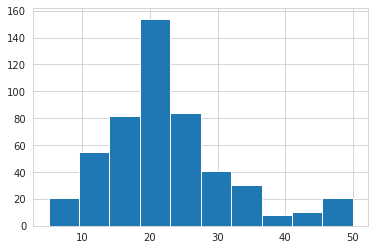

In [6]:
plt.hist(y)
plt.show()

In [7]:
# Realizo la división de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
x_train.shape, y_train.shape

((354, 13), (354, 1))

In [9]:
x_test.shape, y_test.shape

((152, 13), (152, 1))

In [10]:
ml = sm.OLS(y_train, sm.add_constant( x_train))
ml_results = ml.fit()

In [11]:
print(ml_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           4.96e-92
Time:                        10:58:47   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

# Validación de la Regresión

In [12]:
# Valores Ajustados
fitted_values = ml_results.fittedvalues

# Valores residuales
residuals = ml_results.resid

#residuales estandarizados
lm_resid_stand = ml_results.get_influence().resid_studentized_internal

#raiz de los residuales normalizados absolutos
lm_resid_norm_abs_sqrt = np.sqrt(np.abs(lm_resid_stand))

#residuales absolutos
lm_resid_abs = np.abs(residuals)

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})

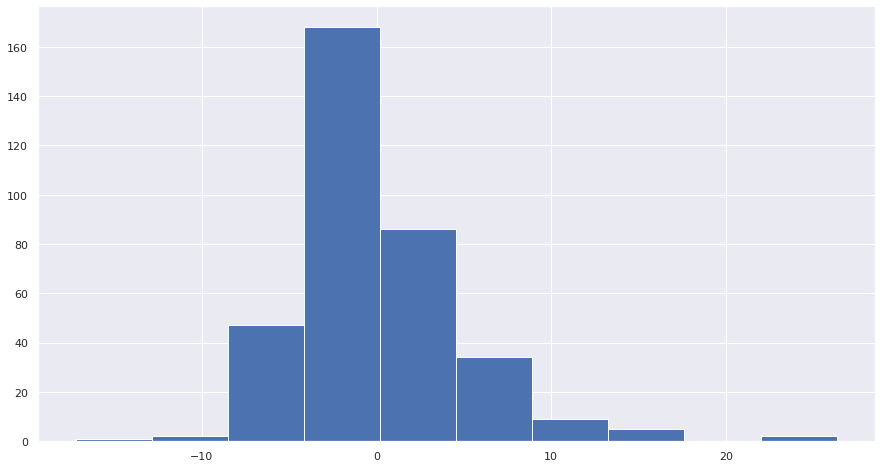

In [14]:
# Residuales
plt.hist(ml_results.resid)
plt.show()

In [15]:
y_pred = ml_results.predict(sm.add_constant(x_test))

In [16]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 21.52


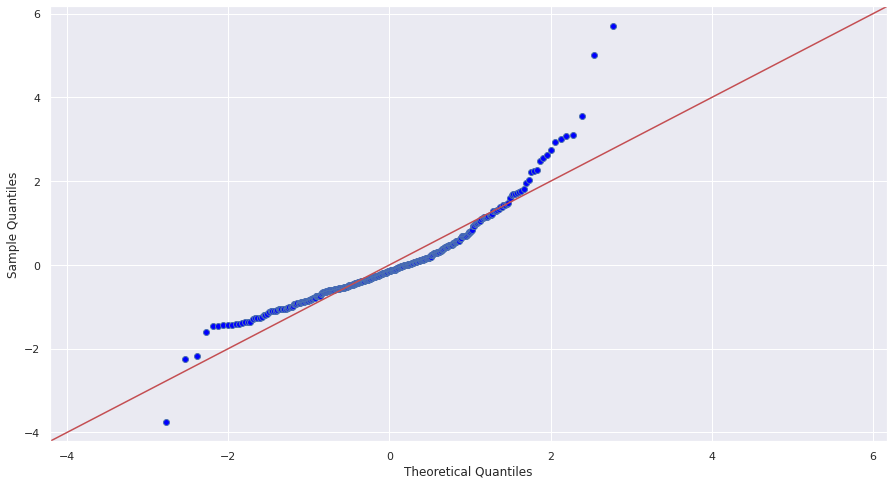

In [17]:
fig = sm.qqplot(lm_resid_stand,line='45')
plt.show()

In [18]:
ml_results.resid.mean()

1.4170711057814427e-14

## Residuales vs ajustados

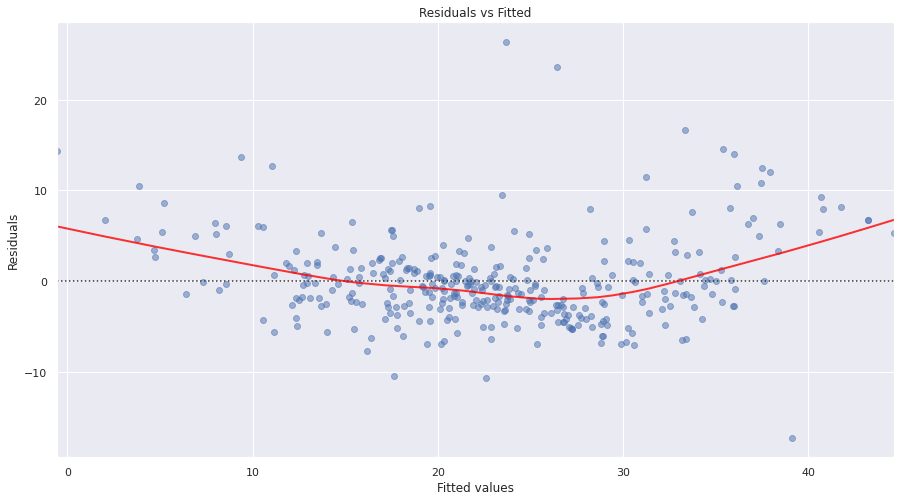

In [19]:
plot = sns.residplot(x=fitted_values, y=residuals, lowess=True,
                     scatter_kws={'alpha': 0.5},
                     line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');


##Scale Location

/home/pedro/anaconda3/envs/env_tf/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyError: 76

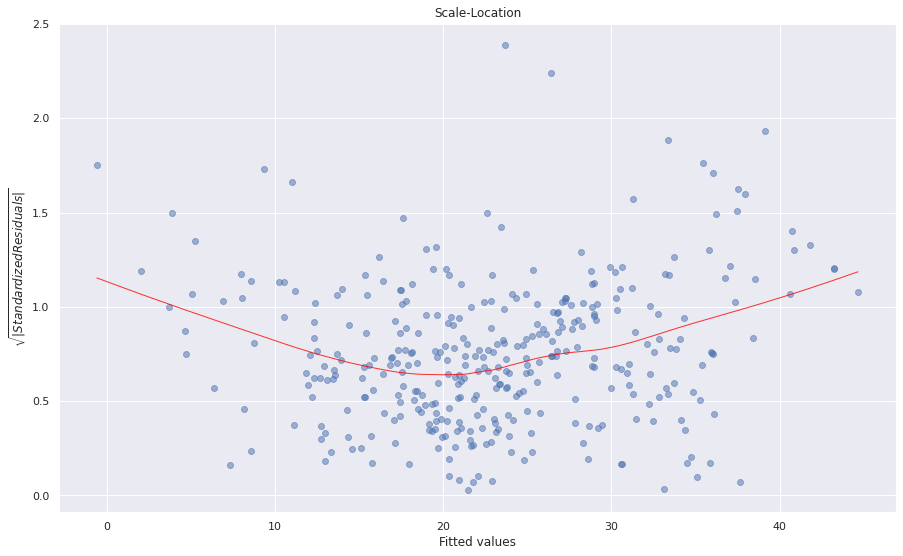

In [20]:
plot_lm_3 = plt.figure(figsize=(15,9))
plt.scatter(fitted_values, lm_resid_norm_abs_sqrt, alpha=0.5);
sns.regplot(fitted_values, lm_resid_norm_abs_sqrt,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(lm_resid_norm_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_sq_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                               xy=(fitted_values[i],
                                   lm_resid_norm_abs_sqrt[i]));
plt.show()